In [1]:
import pandas as pd

In [14]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [15]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [16]:
cols = ['pregnancy','Glucose','BloodPressure' , 'SkinThickness','Insulin','BMI','DiabPedgreeFn','Age','outcome']

In [17]:
df.columns=cols

In [18]:
df.head(n=2)

,pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabPedgreeFn,Age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1


In [19]:
df.columns

Index(['pregnancy', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabPedgreeFn', 'Age', 'outcome'],
      dtype='object')

In [23]:
df.groupby('outcome').size()

outcome
0    500
1    267
dtype: int64

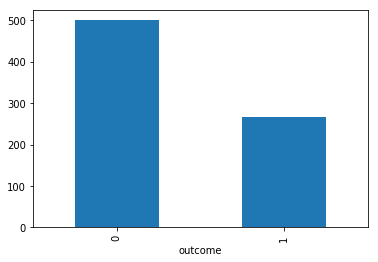

In [31]:
import matplotlib.pyplot as plt
df.groupby('outcome').size().plot.bar()
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
pregnancy        767 non-null int64
Glucose          767 non-null int64
BloodPressure    767 non-null int64
SkinThickness    767 non-null int64
Insulin          767 non-null int64
BMI              767 non-null float64
DiabPedgreeFn    767 non-null float64
Age              767 non-null int64
outcome          767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [33]:
#using k nearest neighbors
from sklearn.model_selection import train_test_splitin_test_split

In [34]:
X_train , X_test  , y_train , y_test = train_test_split(df.loc[:,df.columns !='outcome'],df['outcome'],stratify = df['outcome'],random_state= 42)

In [35]:
X_train.shape

(575, 8)

In [36]:
y_test.shape

(192,)

In [37]:
df.shape

(767, 9)

In [39]:
from  sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train , y_train)
    training_accuracy.append(knn.score(X_train , y_train))
    test_accuracy.append(knn.score(X_test, y_test))

In [40]:
plt.plot(neighbors_settings , training_accuracy , label = 'Training accuracy')
plt.plot(neighbors_settings , test_accuracy , label ='Test accuracy')

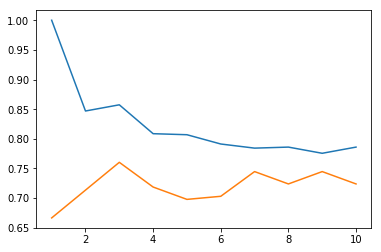

In [41]:
plt.show()

In [42]:
# The best plot occurs at around 9
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [44]:
print('Accuracy for K-nn nearest Neighbor for the training set is : {}' .format(knn.score(X_train,y_train)*100))

Accuracy for K-nn nearest Neighbor for the training set is : 77.56521739130436


In [45]:
print('Accuracy for K-nn nearest Neighbor for the training set is : {}' .format(knn.score(X_test,y_test)*100))

Accuracy for K-nn nearest Neighbor for the training set is : 74.47916666666666


In [46]:
#Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
print('Accuracy for Logistic Regression for the training set is : {}' .format(LR.score(X_train,y_train)*100))

Accuracy for Logistic Regression for the training set is : 79.13043478260869


In [51]:
print('Accuracy for Logistic Regression for the testing set is : {}' .format(LR.score(X_test,y_test)*100))

Accuracy for Logistic Regression for the testing set is : 72.91666666666666


In [53]:
diabetes_features = [x for i ,x in enumerate(df.columns) if i !=8]

In [54]:
diabetes_features

['pregnancy',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabPedgreeFn',
 'Age']

In [55]:
# Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth =3 ,random_state =42)
tree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [58]:
print('Feature_importance : {}' .format(tree.feature_importances_))

Feature_importance : [ 0.          0.71710197  0.          0.          0.          0.17806673
  0.          0.1048313 ]


In [62]:
import numpy as np

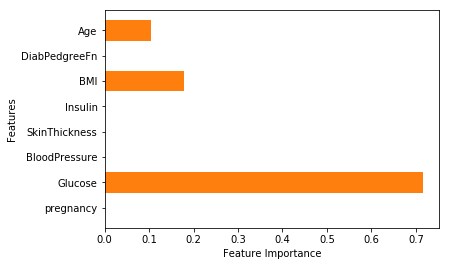

In [63]:
plt.barh(range(8),tree.feature_importances_ , align = 'center')
plt.yticks(np.arange(8),diabetes_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [64]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(n_estimators=100 , random_state=0)

In [71]:
rf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [72]:
print('Accuracy for Random Forest for the training set is : {}' .format(rf.score(X_train,y_train)*100))

Accuracy for Random Forest for the training set is : 100.0


In [73]:
print('Accuracy for Random Forest for the testing set is : {}' .format(rf.score(X_test,y_test)*100))

Accuracy for Random Forest for the testing set is : 74.47916666666666


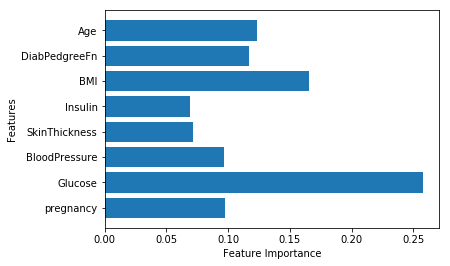

In [74]:
plt.barh(range(8),rf.feature_importances_ , align = 'center')
plt.yticks(np.arange(8),diabetes_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [75]:
# Gradient Boosting


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [77]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [78]:
print('Accuracy for Gradient Boosting for the training set is : {}' .format(gb.score(X_train,y_train)*100))

Accuracy for Gradient Boosting for the training set is : 91.82608695652173


In [79]:
print('Accuracy for Random Forest for the test set is : {}' .format(gb.score(X_test,y_test)*100))

Accuracy for Random Forest for the test set is : 73.4375


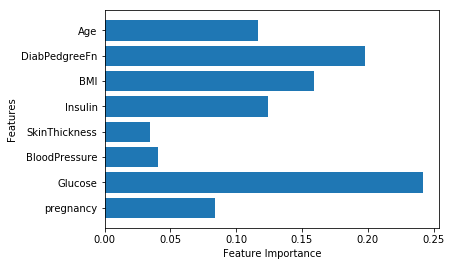

In [80]:
plt.barh(range(8),gb.feature_importances_ , align = 'center')
plt.yticks(np.arange(8),diabetes_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [81]:
# Support Vector Machine
from sklearn.svm import SVC
svc =SVC()
svc.fit(X_train , y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
print('Accuracy for SVC for the training set is : {}' .format(svc.score(X_train,y_train)*100))

Accuracy for SVC for the training set is : 100.0


In [85]:
print('Accuracy for Gradient Boosting for the testing set is : {}' .format(gb.score(X_test,y_test)*100))

Accuracy for Gradient Boosting for the testing set is : 73.4375


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [88]:
svc.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
print('Accuracy for SVC for the training set is : {}' .format(svc.score(X_train_scaled,y_train)*100))

Accuracy for SVC for the training set is : 78.43478260869566


In [91]:
print('Accuracy for SVC for the testing set is : {}' .format(svc.score(X_test_scaled,y_test)*100))

Accuracy for SVC for the testing set is : 70.83333333333334
